<font color = 'red'>MINI LAB RESUBMISSION: SVM & LR CLASSIFCATION
Group 1: Anish Pate, Michael Weatherford, Tom Pengilly, Quynh Chau

<font color = 'red'>We would like to resubmit the following sections as highlighted in red below:

<font color = 'red'>II. Model Advantages III. Interpret Feature Importance IV. Interpret Support Vectors


<font color = 'red' >II. MODEL ADVANTAGES

<font color = 'red'>SVM and LR were built using user-selected parameters and optimal parameters from GridSearchCV. Our various price classes have a uniform distribution and representation in the data set so our class_weights were either set to 'none' or 'balanced' for model builing purposes (both LR and SVM).
The parameter 'C' helps prevent overfitting.  The range for C has to be greater 0,  but the smaller the value of 'C', the less likely the model would overfit.  In our models, our C values range from 0.001 to 100, obtained via optimization using GridSearchCV and SGDClassifier where appropriate. The higher the C values, the higher the weights tend to be in the respective models.
Our SVM models use two different kernels to improve performance.  The 'rbf' model yielded slightly higher accuracy and F1-scores than the linear model. Gamma values affects the inclusion or exclusion of points relative to the nonlinear hyperplane.  Low Gamma values consider points at greater distances resulting in more points will be included, which would yield better boundary definitions and precision model performance.  GridSearchCV was used to find the best combination of C and Gamma, given the 'rbf' kernel.

<font color = 'red'>A.  Processing/Training time

<font color ='red'>In general, given the same data size, LR and optimization methods were faster to process than SVM optimizations. When GridSearchCV was used to find optimal parameters with LR, the process took from 1-5 minutes as compared to the 1+ hours (with a small subset) for GridSearchCV with SVM.   In addition, SGDClassifier with LR also took less training time than GridSearchCV with LR but did not yield a marked difference in overall accuracy.  Optimizations used a random sample of 31,000 rows of data with a training/testing 80:20 split. 

<font color = 'red'>B. Accuracy

<font color = 'red'>Using optimization via GridSearchCV, our SVM model with parameters resulted in an overall accuracy of ~63% where as our best LR model resulted in an overall accuracy of 57%. For our data set, SVM is the better model in terms of accuracy, but has a much longer training time. The SVM model using the rbf kernel performed the best, beating linear SVM models which only had an accuracy of ~ 55%.  Both models used explanatory features including: rooms, bedrooms, bathrooms, surface_total, surface_covered, country, province, department, property types, and log price.  

<font color = 'red'>C. Precision and Recall Performances

<font color = 'red'>In both our LR and SVM models, for a given price class, all of our models performed better with positive predictive value (precision) than with sensitivity in identifying relevant cases among the retrieved instances (recall).

<font color = 'red'>III. INTERPRET FEATURE IMPORTANCE

<font color = 'red'>Our LR models use the following explanatory features to classify price class :  rooms, bedrooms, bathrooms, surface_total, surface_covered, country, province, department, property type price and/or log price. Some variables were transformed using the square root function to normalize the underlying skewed distributions.  In addition, standardization was used to improve comparability as well as processing speed.

<font color = 'red'>The weights from LR models represent the realative importance of different features in classifying price class as 'low', 'average' and 'high'.  Since our data have been scaled, the larger the weights, the more important the feature is in classifying price class.  

# Mini-Project: SVM & LR Classification
Group 1: Anish Patel, Michael Weatherford, Tom Pengilly, Quynh Chau <br>
October 3rd, 2020

Classification Modeling Summary
Introduction 
Project Goals:  
Our goal is to perform price classification analysis on the South American Property listings for various types of properties that are for sale in South America. Support Vector Machines (SVM) and Logistic Regression (LR) models were used to classify properties into three price class categories:Low, Average, High.  In addition, optimization techinques using GridSearchCV for SMV and LR, and SGDClassifier for LR will be use to improve model performance. 

Data Preprocessing and Sample Size:
Our original data set contained 463,724 rows of data.  The Logistic Regression models used the full dataset, while the SVM  models used between 30,000-100,000 randomly sampled rows to be used in our training and test data set for classification modeling. Training/testing for both SVM and LR models used 80:20 split rule. In addition, sampled data was also scaled to improve processing time. Dummy variables were created for property types, country, province, and deparment divisions.

## Data Manipulation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pandas import set_option
set_option('display.max_columns',400)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Import dataset from csv
df = pd.read_csv('C:\\Users\\Tpeng\\OneDrive\\Documents\\SMU\\Term 3\\Machine Learning\\Lab1\\Imputed_Dataset.csv', sep = ',', header = 0)
df = df.drop(columns = 'Unnamed: 0')

In [3]:
# Reformat attributes, excluding categoricals, which aren't supported for the following analysis.
ordinal_vars = ['rooms', 'bedrooms', 'bathrooms' ]
continuous_vars = ['lat', 'lon', 'surface_total', 'surface_covered', 'price', 'log_price']
string_vars = ['id', 'title', 'description']
time_vars = ['start_date', 'end_date', 'created_on']

# Change data types
df[ordinal_vars] = df[ordinal_vars].astype('uint8')
df[continuous_vars] = df[continuous_vars].astype(np.float64)
df[string_vars] = df[string_vars].astype(str)

# Remove observations missing l3 and price before encoding 
df2 = df.dropna(axis = 0, subset = ['price', 'l3'])

## Square Root Transform numeric variables

Apply a square root transformation to numeric variables since these had non-normal distributions. These may be helpful when modeling.

In [4]:
# Transform rooms, bedrooms, bathrooms, surface_total, and surface_covered using square root
df_transform = df2.copy()
df_transform['sqrt_surface_total'] = df_transform.surface_total.transform(func = 'sqrt')
df_transform['sqrt_surface_covered'] = df_transform.surface_covered.transform(func = 'sqrt')
df_transform['sqrt_bedrooms'] = df_transform.bedrooms.transform(func = 'sqrt')
df_transform['sqrt_bathrooms'] = df_transform.bathrooms.transform(func = 'sqrt')
df_transform['sqrt_rooms'] = df_transform.rooms.transform(func = 'sqrt')

df_transform = df_transform.drop(columns = ['surface_total', 'surface_covered', 'bedrooms', 'bathrooms', 'rooms'])

## Get dummy variables for both the transformed and non-transformed datasets
The reference levels that were removed to avoid confounding factors are Argentina for country, Misiones for province, Posadas for department, and Casa for property type.

In [5]:
# Get dummy variables for transformed dataset

# Get n-1 dummy variables, and remove variables we can't use yet (id, start_date, end_date, created_on, lat, lon)
dummy_df = pd.get_dummies(df_transform, columns = ['l1', 'l2', 'l3', 'property_type'], 
                          prefix = {'l1':'Country', 'l2':'Province', 'l3': 'Department', 'property_type': 'Property_type'}, 
                          sparse = True, drop_first = False)
dummy_df = dummy_df.drop(columns = ['Country_Argentina', 'Province_Misiones', 'Department_Posadas', 'Property_type_Casa'])
trans = dummy_df.drop(columns = ['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'description'])
trans.head()

,price,log_price,price_class,sqrt_surface_total,sqrt_surface_covered,sqrt_bedrooms,sqrt_bathrooms,sqrt_rooms,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Province_Ancash,Province_Antioquia,Province_Apurimac,Province_Arequipa,Province_Atlántico,Province_Ayacucho,Province_Azuay,Province_Bolívar,Province_Boyacá,Province_Bs.As. G.B.A. Zona Norte,Province_Bs.As. G.B.A. Zona Oeste,Province_Bs.As. G.B.A. Zona Sur,Province_Buenos Aires Costa Atlántica,Province_Buenos Aires Interior,Province_Cajamarca,Province_Caldas,Province_Callao,Province_Canelones,Province_Capital Federal,Province_Caquetá,Province_Casanare,Province_Catamarca,Province_Cauca,Province_Cesar,Province_Chaco,Province_Chocó,Province_Chubut,Province_Colonia,Province_Corrientes,Province_Cundinamarca,Province_Cusco,Province_Córdoba,Province_El Oro,Province_Entre Ríos,Province_Formosa,Province_Guayas,Province_Huancavelica,Province_Huila,Province_Huánuco,Province_Ica,Province_Imbabura,Province_Jujuy,Province_Junín,Province_La Guajira,Province_La Libertad,Province_La Pampa,Province_La Rioja,Province_Lambayeque,Province_Lima,Province_Loreto,Province_Madre de Dios,Province_Magdalena,Province_Maldonado,Province_Manabi,Province_Mendoza,Province_Meta,Province_Montevideo,Province_Moquegua,Province_Morona Santiago,Province_Nariño,Province_Neuquén,Province_Norte de Santander,Province_Pasco,Province_Pastaza,Province_Pichincha,Province_Piura,Province_Puno,Province_Putumayo,Province_Quindío,Province_Risaralda,Province_Rocha,Province_Río Negro,Province_Salta,Province_San Andrés Providencia y Santa Catalina,Province_San Juan,Province_San Luis,Province_San Martin,Province_Santa Cruz,Province_Santa Fe,Province_Santander,Province_Santiago Del Estero,Province_Santo Domingo De Los Tsáchilas,Province_Sucre,Province_Tacna,Province_Tierra Del Fuego,Province_Tolima,Province_Tucumán,Province_Tumbes,Province_Tungurahua,Province_Ucayali,Province_Valle del Cauca,Province_Vichada,Department_9 de Julio,Department_Abasto,Department_Abejorral,Department_Acacías,Department_Acambuco,Department_Acebal,Department_Achiras,Department_Adolfo Alsina,Department_Agronomía,Department_Agua de Dios,Department_Agua de Oro,Department_Aguada,Department_Aguas Verdes,Department_Aguazul,Department_Aipe,Department_Alberti,Department_Albán,Department_Alcorta,Department_Aldao,Department_Aldea Brasilera,Department_Aldea Spatzenkutter,Department_Allen,Department_Almafuerte,Department_Almagro,Department_Almirante Brown,Department_Alpa Corral,Department_Alta Gracia,Department_Alto Amazonas,Department_Aluminé,Department_Alvear,Department_Ambato,Department_Anapoima,Department_Andalucía,Department_Angélica,Department_Anillaco,Department_Anisacate,Department_Anolaima,Department_Anserma,Department_Anta,Department_Apulo,Department_Apóstoles,Department_Arata,Department_Arbeláez,Department_Arequipa,Department_Arjona,Department_Armenia,Department_Arrecifes,Department_Arroyito,Department_Arroyo Aguiar,Department_Arroyo Leyes,Department_Arroyo Seco,Department_Ascochinga,Department_Ascope,Department_Atahualpa,Department_Ataliva Roca,Department_Atlántida,Department_Avellaneda,Department_Ayacucho,Department_Azul,Department_Añelo,Department_Bahía Blanca,Department_Balboa,Department_Balcarce,Department_Balnearia,Department_Balneario Orense,Department_Balneario Sauce Grande,Department_Balvanera,Department_Banda del Río Salí,Department_Baradero,Department_Baranoa,Department_Barbosa,Department_Barda del Medio,Department_Barichara,Department_Barracas,Department_Barranca,Department_Barrancabermeja,Department_Barrancas,Department_Barranqueras,Department_Barranquilla,Department_Barrio Cívico,Department_Barrio Norte,Department_Barrio Ruta 40,Department_Barrio Sur,Department_Basavilbaso,Department_Belgrano,Department_Bell Ville,Department_Bella Italia,Department_Bella vista,Department_Bello,Department_Belvedere,Department_Benito Juárez,Department_Berazategui,Department_Berisso,Department_Bernardo de Irigoyen,Department_Berrotarán,Department

In [ ]:
#### This gets dummy variables for the non-transformed dataset

# Get n-1 dummy variables, and remove variables we can't use yet (id, start_date, end_date, created_on, lat, lon)
dummy_df = pd.get_dummies(df2, columns = ['l1', 'l2', 'l3', 'property_type'], 
                          prefix = {'l1':'Country', 'l2':'Province', 'l3': 'Department', 'property_type': 'Property_type'}, 
                          sparse = True, drop_first = False)
dummy_df = dummy_df.drop(columns = ['Country_Argentina', 'Province_Misiones', 'Department_Posadas', 'Property_type_Casa'])
nontrans = dummy_df.drop(columns = ['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'description'])
nontrans.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,log_price,price_class,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Province_Ancash,Province_Antioquia,Province_Apurimac,Province_Arequipa,Province_Atlántico,Province_Ayacucho,Province_Azuay,Province_Bolívar,Province_Boyacá,Province_Bs.As. G.B.A. Zona Norte,Province_Bs.As. G.B.A. Zona Oeste,Province_Bs.As. G.B.A. Zona Sur,Province_Buenos Aires Costa Atlántica,Province_Buenos Aires Interior,Province_Cajamarca,Province_Caldas,Province_Callao,Province_Canelones,Province_Capital Federal,Province_Caquetá,Province_Casanare,Province_Catamarca,Province_Cauca,Province_Cesar,Province_Chaco,Province_Chocó,Province_Chubut,Province_Colonia,Province_Corrientes,Province_Cundinamarca,Province_Cusco,Province_Córdoba,Province_El Oro,Province_Entre Ríos,Province_Formosa,Province_Guayas,Province_Huancavelica,Province_Huila,Province_Huánuco,Province_Ica,Province_Imbabura,Province_Jujuy,Province_Junín,Province_La Guajira,Province_La Libertad,Province_La Pampa,Province_La Rioja,Province_Lambayeque,Province_Lima,Province_Loreto,Province_Madre de Dios,Province_Magdalena,Province_Maldonado,Province_Manabi,Province_Mendoza,Province_Meta,Province_Montevideo,Province_Moquegua,Province_Morona Santiago,Province_Nariño,Province_Neuquén,Province_Norte de Santander,Province_Pasco,Province_Pastaza,Province_Pichincha,Province_Piura,Province_Puno,Province_Putumayo,Province_Quindío,Province_Risaralda,Province_Rocha,Province_Río Negro,Province_Salta,Province_San Andrés Providencia y Santa Catalina,Province_San Juan,Province_San Luis,Province_San Martin,Province_Santa Cruz,Province_Santa Fe,Province_Santander,Province_Santiago Del Estero,Province_Santo Domingo De Los Tsáchilas,Province_Sucre,Province_Tacna,Province_Tierra Del Fuego,Province_Tolima,Province_Tucumán,Province_Tumbes,Province_Tungurahua,Province_Ucayali,Province_Valle del Cauca,Province_Vichada,Department_9 de Julio,Department_Abasto,Department_Abejorral,Department_Acacías,Department_Acambuco,Department_Acebal,Department_Achiras,Department_Adolfo Alsina,Department_Agronomía,Department_Agua de Dios,Department_Agua de Oro,Department_Aguada,Department_Aguas Verdes,Department_Aguazul,Department_Aipe,Department_Alberti,Department_Albán,Department_Alcorta,Department_Aldao,Department_Aldea Brasilera,Department_Aldea Spatzenkutter,Department_Allen,Department_Almafuerte,Department_Almagro,Department_Almirante Brown,Department_Alpa Corral,Department_Alta Gracia,Department_Alto Amazonas,Department_Aluminé,Department_Alvear,Department_Ambato,Department_Anapoima,Department_Andalucía,Department_Angélica,Department_Anillaco,Department_Anisacate,Department_Anolaima,Department_Anserma,Department_Anta,Department_Apulo,Department_Apóstoles,Department_Arata,Department_Arbeláez,Department_Arequipa,Department_Arjona,Department_Armenia,Department_Arrecifes,Department_Arroyito,Department_Arroyo Aguiar,Department_Arroyo Leyes,Department_Arroyo Seco,Department_Ascochinga,Department_Ascope,Department_Atahualpa,Department_Ataliva Roca,Department_Atlántida,Department_Avellaneda,Department_Ayacucho,Department_Azul,Department_Añelo,Department_Bahía Blanca,Department_Balboa,Department_Balcarce,Department_Balnearia,Department_Balneario Orense,Department_Balneario Sauce Grande,Department_Balvanera,Department_Banda del Río Salí,Department_Baradero,Department_Baranoa,Department_Barbosa,Department_Barda del Medio,Department_Barichara,Department_Barracas,Department_Barranca,Department_Barrancabermeja,Department_Barrancas,Department_Barranqueras,Department_Barranquilla,Department_Barrio Cívico,Department_Barrio Norte,Department_Barrio Ruta 40,Department_Barrio Sur,Department_Basavilbaso,Department_Belgrano,Department_Bell Ville,Department_Bella Italia,Department_Bella vista,Department_Bello,Department_Belvedere,Department_Benito Juárez,Department_Berazategui,Department_Berisso,Department_Bernardo de Irigoyen,Department_Berrotarán,Department_Bialet Massé,...,Departm

## Split and transform the data

In [6]:
# Scale transformed dataset
from sklearn.preprocessing import StandardScaler
import scipy

# Create a copy of the dataframe and select features to standardize
scaled_features = trans.copy()
col = ['sqrt_rooms', 'sqrt_bedrooms', 'sqrt_bathrooms', 'sqrt_surface_total', 'sqrt_surface_covered']

# Scale select features
features = scaled_features[col]
std_scl = StandardScaler().fit(features.values)
features = std_scl.transform(features.values)

# Overwrite dataframe
scaled_features[col] = features
trans2 = scaled_features

In [ ]:
# Scale non-transformed dataset
from sklearn.preprocessing import StandardScaler
import scipy

# Create a copy of the dataframe and select features to standardize
scaled_features = nontrans.copy()
col = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

# Scale select features
features = scaled_features[col]
std_scl = StandardScaler().fit(features.values)
features = std_scl.transform(features.values)

# Overwrite dataframe
scaled_features[col] = features
nontrans2 = scaled_features

In [ ]:
# Split the non-transformed data
y = nontrans2.price_class.values
X = nontrans2.drop(columns = ['price_class', 'price']).values
X = scipy.sparse.csr_matrix(X)

In [7]:
# Convert dataframe to a sparse matrix to reduce computation time and prevent errors
# Split the transformed data
yt = trans2.price_class.values
Xt = trans2.drop(columns = ['price_class', 'price']).values
Xt = scipy.sparse.csr_matrix(Xt)

In [8]:
# Get column names for weights
from pandas import DataFrame
cols = trans2.drop(columns = ['price_class', 'price'])

colnames = list(cols.columns)
col_name_df = DataFrame(colnames, columns = ['Attribute'])

## CREATE MODELS
1. Logistic Regression Modeling

An initial logistic regression model was generated using non-transformed variables and user-selected grid search hyperparameters. Then a grid search was performed over the hyperparameters of interest on the transformed data. The results of the 2 grid searches were compared to create the final logistic regression model.

## First Logistic Regression Model

In [ ]:
# Run a logistic regression on the non-transformed data with 
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics as mt

# create the logistic regression and grid search objects

lr_obj = LogisticRegressionCV(Cs = [.001, .01, .1, 1], n_jobs = 32 , multi_class = 'multinomial', 
                              max_iter = 200, random_state = 6, cv = 3)

In [ ]:
# Fit to non-transformed data
lr_obj.fit(X,y)

C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], class_weight=None, cv=3,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=200, multi_class='multinomial', n_jobs=32,
           penalty='l2', random_state=6, refit=True, scoring=None,
           solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# Output the best parameters: c = .01 was the best 
print(lr_obj.C_)
# print the accuracies
print(lr_obj.scores_)
# Print the weights
print(lr_obj.coef_)

[0.01 0.01 0.01]
{'Average': array([[0.58790533, 0.59591495, 0.59926023, 0.59947101],
       [0.59030951, 0.5970885 , 0.59809481, 0.59833959],
       [0.40257427, 0.39349022, 0.38863542, 0.38639841]]), 'High': array([[0.58790533, 0.59591495, 0.59926023, 0.59947101],
       [0.59030951, 0.5970885 , 0.59809481, 0.59833959],
       [0.40257427, 0.39349022, 0.38863542, 0.38639841]]), 'Low': array([[0.58790533, 0.59591495, 0.59926023, 0.59947101],
       [0.59030951, 0.5970885 , 0.59809481, 0.59833959],
       [0.40257427, 0.39349022, 0.38863542, 0.38639841]])}
[[-0.00273277 -0.04496078 -0.02559415 ...  0.03690546 -0.26345275
   0.01929822]
 [ 0.14783316  0.19789999  0.1426187  ...  0.08408253  0.22405793
   0.12320001]
 [-0.14510039 -0.15293921 -0.11702455 ... -0.12098799  0.03939483
  -0.14249823]]


The model performance using non-transformed variables was average at around 59.9%. Given the assumptions of logistic regression models, transformed variables were used in a grid search.

In [ ]:
# Run Logistic Regression model on transformed data

lr_obj = LogisticRegressionCV(Cs = [.001, .01, .1, 1], n_jobs = 32 , multi_class = 'multinomial', 
                              max_iter = 200, random_state = 6, cv = 3, verbose = 2)

In [ ]:
# Fit to non-transformed data
lr_obj.fit(Xt,yt)

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   3 out of   3 | elapsed:  1.4min finished
C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], class_weight=None, cv=3,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=200, multi_class='multinomial', n_jobs=32,
           penalty='l2', random_state=6, refit=True, scoring=None,
           solver='lbfgs', tol=0.0001, verbose=2)

In [ ]:
# Output the best parameters: c = .01 was the best 
print(lr_obj.C_)
# print the accuracies
print(lr_obj.scores_)
# Print the weights
print(lr_obj.coef_)

[0.1 0.1 0.1]
{'Average': array([[0.59153618, 0.59991297, 0.60419656, 0.60401977],
       [0.59515067, 0.60192287, 0.60434345, 0.60481941],
       [0.40468889, 0.39517648, 0.39017889, 0.38866262]]), 'High': array([[0.59153618, 0.59991297, 0.60419656, 0.60401977],
       [0.59515067, 0.60192287, 0.60434345, 0.60481941],
       [0.40468889, 0.39517648, 0.39017889, 0.38866262]]), 'Low': array([[0.59153618, 0.59991297, 0.60419656, 0.60401977],
       [0.59515067, 0.60192287, 0.60434345, 0.60481941],
       [0.40468889, 0.39517648, 0.39017889, 0.38866262]])}
[[ 0.00693814  0.01067004 -0.01186578 ...  0.01542448 -0.29765115
   0.00608325]
 [ 0.37614244 -0.02467584 -0.00782889 ...  0.17667694  0.25283234
   0.33869809]
 [-0.38308059  0.0140058   0.01969467 ... -0.19210142  0.04481882
  -0.34478134]]


## Final Logistic Regression Model
A final Grid Search was conducted to find the optimal hyperparameters. The following model is the final logistic regression model.

In [ ]:
# Run Logistic Regression model on transformed data

lr_obj = LogisticRegressionCV(Cs = [.01, .015, .02, .025], n_jobs = 32 , multi_class = 'multinomial', 
                              max_iter = 2000, random_state = 6, cv = 3)

In [ ]:
# Fit to non-transformed data
lr_obj.fit(Xt,yt)

LogisticRegressionCV(Cs=[0.01, 0.015, 0.02, 0.025], class_weight=None, cv=3,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=2000, multi_class='multinomial', n_jobs=32,
           penalty='l2', random_state=6, refit=True, scoring=None,
           solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# Output the best parameters: c = .025 was the optimal hyperparameter
print(lr_obj.C_)
# print the accuracies
print(lr_obj.scores_)
# Print the weights
print(lr_obj.coef_)

[0.025 0.025 0.025]
{'Average': array([[0.60039572, 0.60185078, 0.60263951, 0.60323785],
       [0.60307876, 0.60370431, 0.60407827, 0.60424826],
       [0.39443534, 0.39328624, 0.39232072, 0.39179716]]), 'High': array([[0.60039572, 0.60185078, 0.60263951, 0.60323785],
       [0.60307876, 0.60370431, 0.60407827, 0.60424826],
       [0.39443534, 0.39328624, 0.39232072, 0.39179716]]), 'Low': array([[0.60039572, 0.60185078, 0.60263951, 0.60323785],
       [0.60307876, 0.60370431, 0.60407827, 0.60424826],
       [0.39443534, 0.39328624, 0.39232072, 0.39179716]])}
[[ 0.00828088  0.00934453 -0.01155355 ...  0.01915316 -0.29187291
   0.00156769]
 [ 0.37619462 -0.02485087 -0.00387069 ...  0.1540993   0.26029893
   0.31078768]
 [-0.3844755   0.01550635  0.01542424 ... -0.17325246  0.03157398
  -0.31235538]]


In [10]:
# Create a cross-validation object
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

num_cv_iterations = 5
num_instances = len(yt)
cv_obj = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2, random_state = 6)
lr_obj = LogisticRegression(C=0.025, solver = 'lbfgs', multi_class = 'multinomial', verbose = 3, n_jobs = 32)

In [12]:
# Run CV logistic regression with selected hyperparameters
from sklearn import metrics as mt
iter_num=0

for train_indices, test_indices in cv_obj.split(Xt,yt): 

    X_train = Xt[train_indices]
    y_train = yt[train_indices]
    
    X_test = Xt[test_indices]
    y_test = yt[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_obj.fit(X_train,y_train)  # train object
    y_hat = lr_obj.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 out of   1 | elapsed:   13.8s finished


====Iteration 0  ====
accuracy 0.5732514391913331
confusion matrix
 [[11693  8476  9282]
 [ 6524 20061  4139]
 [ 5989  3248 18832]]


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 out of   1 | elapsed:   13.8s finished


====Iteration 1  ====
accuracy 0.5725828384932686
confusion matrix
 [[11706  9087  8894]
 [ 6483 20396  3886]
 [ 5810  3557 18425]]


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 out of   1 | elapsed:   13.6s finished


====Iteration 2  ====
accuracy 0.574667966094012
confusion matrix
 [[11323  9500  8764]
 [ 6204 20900  3738]
 [ 5904  3423 18488]]


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 out of   1 | elapsed:   13.6s finished


====Iteration 3  ====
accuracy 0.5720842210235256
confusion matrix
 [[11403  9260  8628]
 [ 6435 20632  3818]
 [ 6155  3465 18448]]


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 out of   1 | elapsed:   13.3s finished


====Iteration 4  ====
accuracy 0.5719029055799828
confusion matrix
 [[11393  9298  8927]
 [ 6327 20385  3893]
 [ 5737  3595 18689]]


In [ ]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

     Average       0.49      0.38      0.43     29618
        High       0.61      0.67      0.64     30605
         Low       0.59      0.67      0.63     28021

   micro avg       0.57      0.57      0.57     88244
   macro avg       0.56      0.57      0.57     88244
weighted avg       0.56      0.57      0.56     88244



The final logistic regression model had an accuracy and recall of about 57% and a precision of 56%. The optimal hyperparameters used were C = .025 using multinomial classification and a 3-fold cross-validated. This is only nominally better than the initial model.

In [13]:
# Get the weights from the final Logistic Regression model and analyze
low_weights = DataFrame(lr_obj.coef_[0], columns = ['Low_weight'])
avg_weights = DataFrame(lr_obj.coef_[1], columns = ['Average_weight'])
high_weights = DataFrame(lr_obj.coef_[2], columns = ['High_weight'])

weights = pd.concat([col_name_df, low_weights, avg_weights, high_weights], axis = 1)
print(weights.head(60))
print(weights.tail(15))

                                Attribute  Low_weight  Average_weight  \
0                               log_price    0.010380        0.137895   
1                      sqrt_surface_total    0.001784        0.007500   
2                    sqrt_surface_covered   -0.020511        0.015462   
3                           sqrt_bedrooms   -0.079576        0.210889   
4                          sqrt_bathrooms   -0.028874        0.290237   
5                              sqrt_rooms   -0.026030        0.200966   
6                        Country_Colombia   -0.164044       -0.594016   
7                         Country_Ecuador    0.004068       -0.012469   
8                            Country_Perú    0.048258       -0.306105   
9                         Country_Uruguay    0.093233        0.838676   
10                        Province_Ancash   -0.004387        0.001354   
11                     Province_Antioquia    0.090014        0.132441   
12                      Province_Apurimac   -0.0011

In [42]:
# Determine which weights are most important for each price classification
low_imp = weights[abs(weights.Low_weight) > .2]
avg_imp = weights[abs(weights.Average_weight) > .5]
high_imp = weights[abs(weights.High_weight) > .5]
print(high_imp)

                              Attribute  Low_weight  Average_weight  \
6                      Country_Colombia   -0.164044       -0.594016   
9                       Country_Uruguay    0.093233        0.838676   
19    Province_Bs.As. G.B.A. Zona Norte    0.171494        0.386456   
28             Province_Capital Federal    0.238162        0.663539   
41                     Province_Córdoba    0.110515       -0.789746   
62                   Province_Maldonado    0.017910        0.745813   
168                Department_Balvanera    0.008896       -0.570674   
186                 Department_Belgrano   -0.236834        1.116507   
190                    Department_Bello   -0.385702       -0.306132   
202               Department_Bogotá D.C    0.197310        0.607676   
429                 Department_Envigado    0.351738        0.287756   
490       Department_General San Martín    0.019334       -0.904985   
703                 Department_Medellín    0.103564        0.421651   
764   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

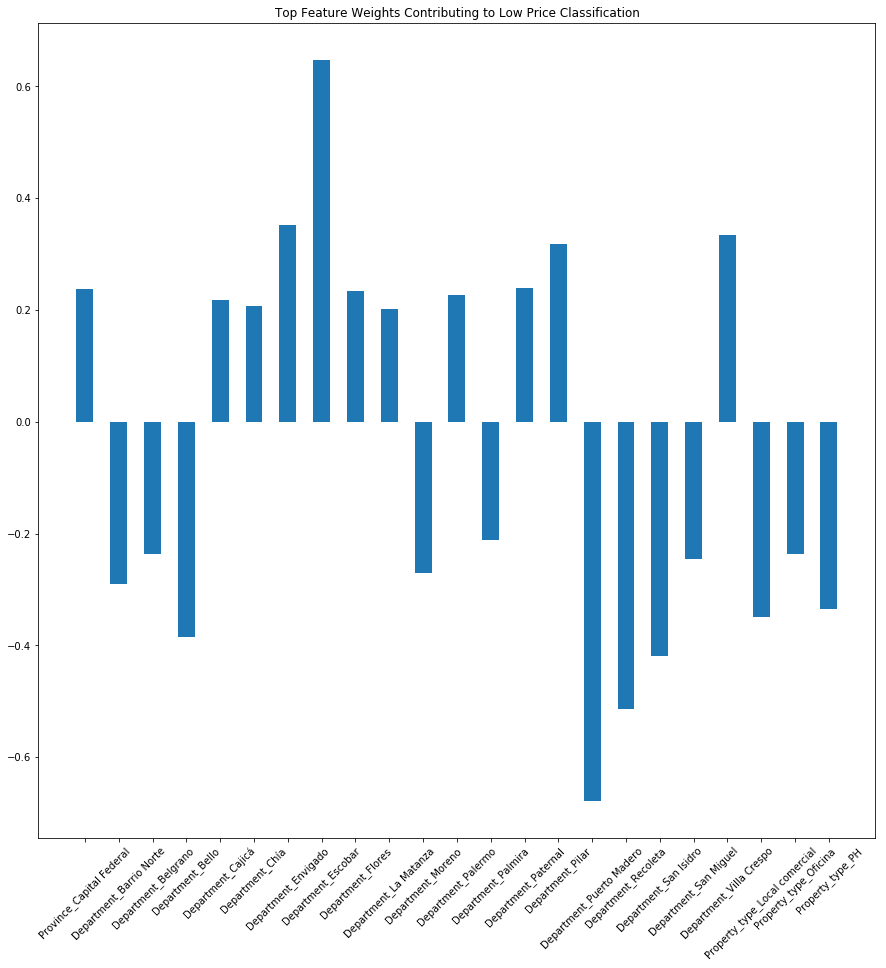

In [44]:
# Use a bar chart to visualize weights by price classification
import matplotlib.pyplot as plt

labels = low_imp.Attribute

fig, ax = plt.subplots(figsize = (15,15))
width = .5

plt.bar(np.arange(len(low_imp)), low_imp.Low_weight, width = width)
ax.set_title('Top Feature Weights Contributing to Low Price Classification')
ax.set_ylabel = 'Weight'
ax.set_xticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

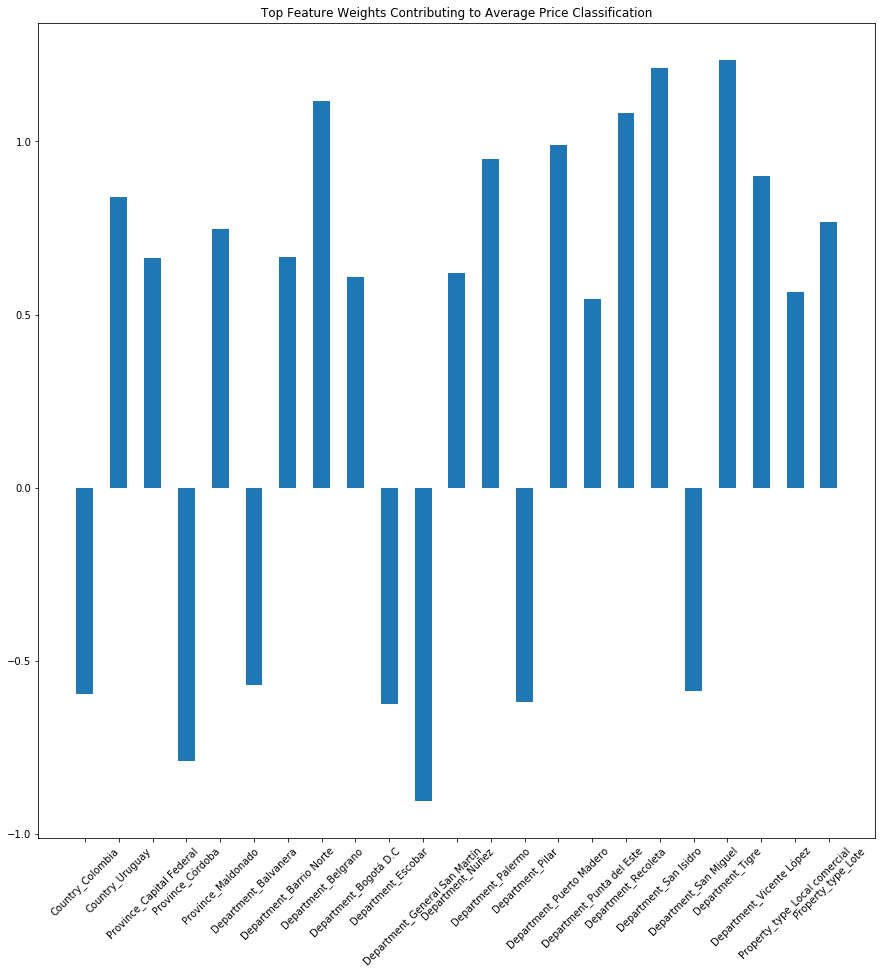

In [37]:
# Use a bar chart to visualize weights by price classification
import matplotlib.pyplot as plt

labels = avg_imp.Attribute

fig, ax = plt.subplots(figsize = (15,15))
width = .5

plt.bar(np.arange(len(avg_imp)), avg_imp.Average_weight, width = width)
ax.set_title('Top Feature Weights Contributing to Average Price Classification')
ax.set_ylabel = 'Weight'
ax.set_xticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

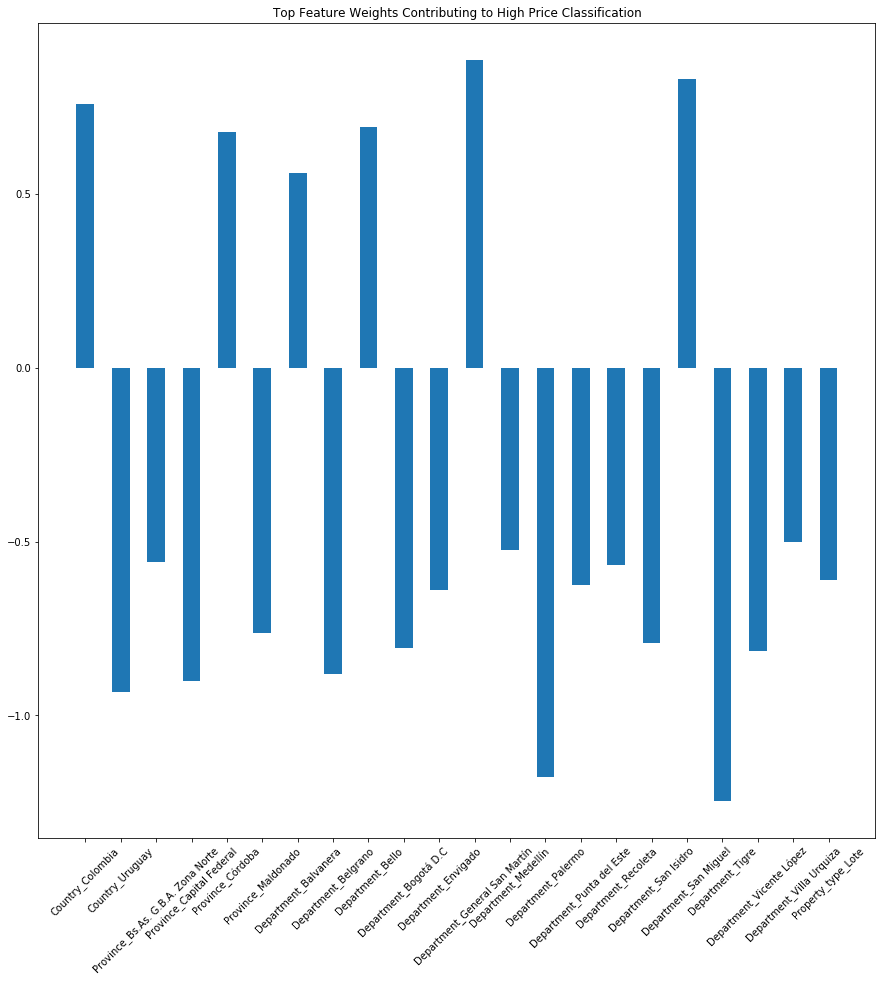

In [38]:
# Use a bar chart to visualize weights by price classification
import matplotlib.pyplot as plt

labels = high_imp.Attribute

fig, ax = plt.subplots(figsize = (15,15))
width = .5

plt.bar(np.arange(len(high_imp)), high_imp.High_weight, width = width)
ax.set_title('Top Feature Weights Contributing to High Price Classification')
ax.set_ylabel = 'Weight'
ax.set_xticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
plt.xticks(rotation=45)

In [ ]:
# Compare the weights for numeric variables and property types across each price classification
num_weights = weights[0:6]
num_weights = num_weights.append(weights[1203:1213])
num_weights

Text(0.5, 1.0, 'Logistic Regression Weights for Numeric and Property Type Attributes')

<Figure size 2160x2160 with 0 Axes>

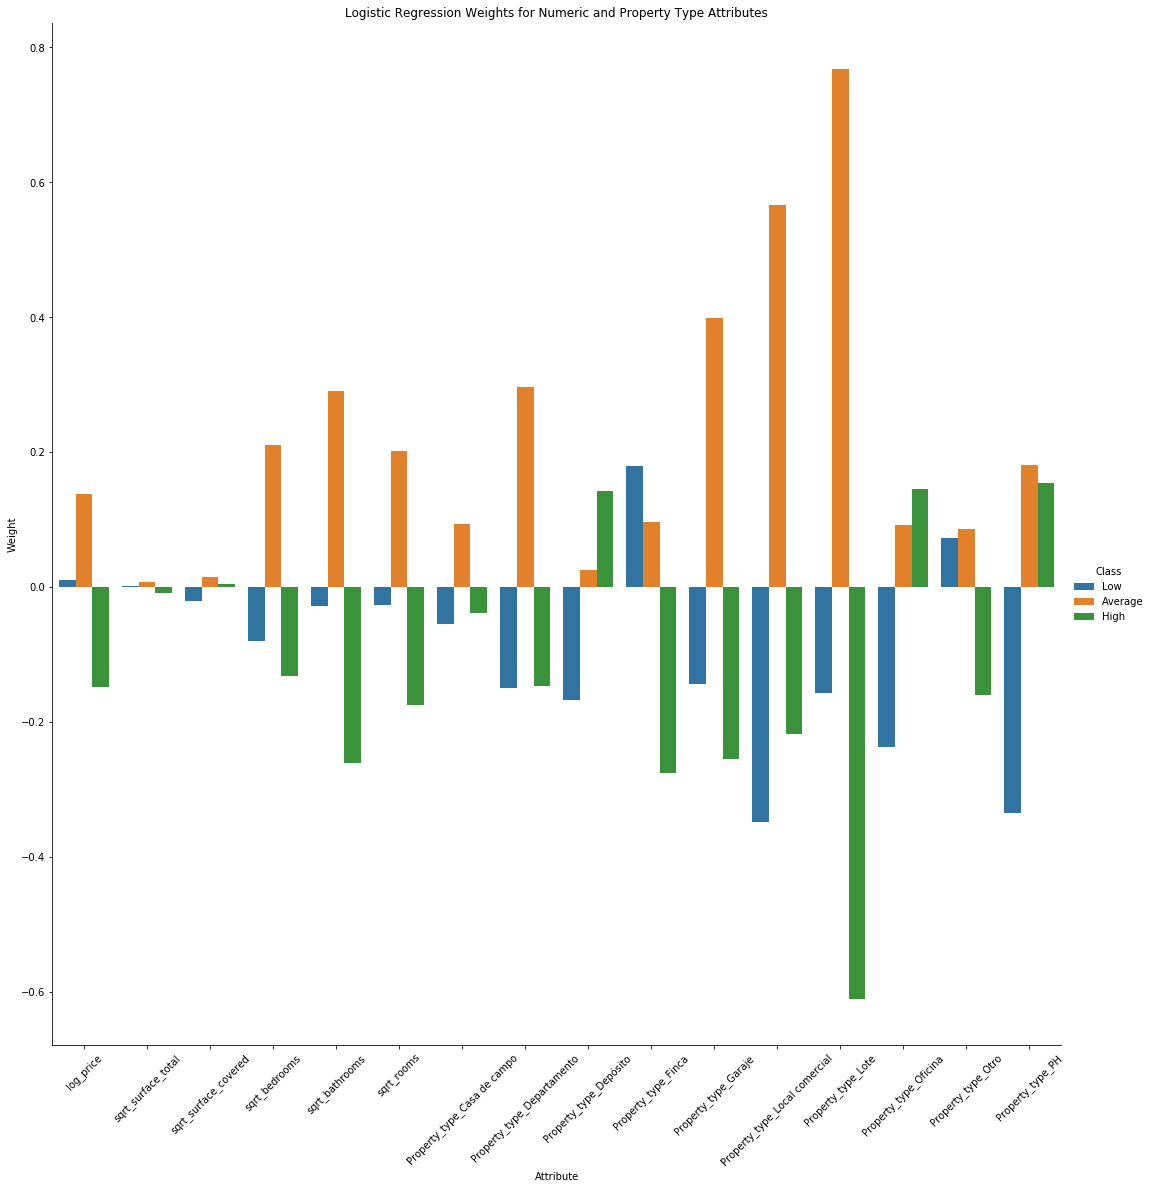

In [200]:
import seaborn as sns
low = np.array(num_weights.Low_weight.values)
low_class = ['Low']*len(low)
avg = np.array(num_weights.Average_weight.values)
avg_class = ['Average']*len(avg)
high = np.array(num_weights.High_weight.values)
high_class = ['High']*len(high)

classes = [low_class, avg_class, high_class]
classes = np.ravel(classes)
weights = [low, avg, high]
weights = np.ravel(weights)
attributes = [num_weights.Attribute, num_weights.Attribute, num_weights.Attribute]
attributes = np.ravel(attributes)

weights_df = DataFrame({'Attribute' : attributes, 'Weight' : weights, 'Class' : classes})

plt.figure(figsize = (30,30))
g = sns.catplot(data = weights_df, kind = 'bar', x = 'Attribute', y = 'Weight', hue = 'Class', height = 15, aspect = 1)
g.set_xticklabels(rotation=45)
plt.title('Logistic Regression Weights for Numeric and Property Type Attributes')


# CREATE MODEL
2. Support Vector Machine Modeling

Our dataset was too large to use in full for training our SVM models.  A subset of the data was used in exploring hyperparameter values. An initial SVM model was run using grid search to determine hyperparameter magnitudes. A model was then created using another grid search with more focused hyperparameter windows.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a subset dataset with 31000 observations since the full dataset takes too long
subset = trans2.sample(n=31000, random_state = 6, axis = 0)

# Create SVM object
svm_clf = SVC(random_state = 6)

# Perform grid search
gs_clf = GridSearchCV(svm_clf, param_grid = {'C':[0.001, .01, 10, 100], 
                                            'kernel':['linear', 'rbf'], 'class_weight':[None]}, n_jobs = 30, 
                      verbose = 2, cv = 3)
# Convert dataframe to a sparse matrix to reduce computation time and prevent errors
# Split the transformed data
yt = subset.price_class.values
Xt = subset.drop(columns = ['price_class', 'price']).values
Xt = scipy.sparse.csr_matrix(Xt)

In [ ]:
gs_clf.fit(Xt, yt)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   4 out of  24 | elapsed:  3.1min remaining: 15.7min
[Parallel(n_jobs=30)]: Done  17 out of  24 | elapsed:  3.5min remaining:  1.5min
[Parallel(n_jobs=30)]: Done  24 out of  24 | elapsed: 16.8min finished


The grid search was conducted over a wide range of C values and using both linear and rbf kernels to determine which kernel performs the best and which regularization strength produces the most generalizable but effective model. Next we test a range of linear SVM models with a narrow window of Cs to find the optimal parameters.

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a subset dataset with 31000 observations since the full dataset takes too long
subset = trans2.sample(n=31000, random_state = 6, axis = 0)

# Create SVM object
svm_clf = SVC(random_state = 6, C = 100, gamma = 0.01, kernel = 'rbf', verbose = 2)

# Perform grid search
#gs_clf = GridSearchCV(svm_clf, param_grid = {'C':[0.001, 100], 
#                                            'kernel':['linear', 'rbf'], 'gamma' = [.01], class_weight':[None]}, n_jobs = 30, 
#                      verbose = 2, cv = 3)
# Convert dataframe to a sparse matrix to reduce computation time and prevent errors
# Split the transformed data
yt = subset.price_class.values
Xt = subset.drop(columns = ['price_class', 'price']).values
Xt = scipy.sparse.csr_matrix(Xt)

In [78]:
svm_clf.fit(Xt, yt)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=6, shrinking=True,
  tol=0.001, verbose=2)

In [100]:
vectors = svm_clf.support_vectors_
print(vectors)


  (0, 0)	12.167851432709975
  (0, 1)	-0.21620958530953338
  (0, 2)	-0.08236434511371055
  (0, 3)	-0.22160598360812292
  (0, 4)	0.8517720806266813
  (0, 5)	-0.03804659979994982
  (0, 8)	1.0
  (0, 58)	1.0
  (0, 637)	1.0
  (0, 1204)	1.0
  (1, 0)	13.016780614829266
  (1, 1)	2.7786730613360446
  (1, 2)	0.3077913657944351
  (1, 3)	0.6874471630964122
  (1, 4)	0.0718237720591075
  (1, 5)	1.6680283337810429
  (1, 20)	1.0
  (1, 1078)	1.0
  (1, 1212)	1.0
  (2, 0)	13.017002861746507
  (2, 1)	0.36555096505795004
  (2, 2)	0.5698051642691395
  (2, 3)	0.6874471630964122
  (2, 4)	0.8517720806266813
  (2, 5)	0.5988260593297395
  :	:
  (23572, 1)	-0.30638575375104027
  (23572, 2)	-0.32926169484173806
  (23572, 3)	-1.4039327756410152
  (23572, 4)	-0.9425875249735652
  (23572, 5)	-0.7957856029980473
  (23572, 28)	1.0
  (23572, 168)	1.0
  (23572, 1204)	1.0
  (23573, 0)	11.512925464970227
  (23573, 1)	-0.37961960329529376
  (23573, 2)	-0.2655514505142019
  (23573, 3)	0.6874471630964122
  (23573, 4)	-0.942587

In [144]:
# Create a vector dataframe
vector_dense = scipy.sparse.csr_matrix.todense(vectors)
vector_dense = np.squeeze(np.array(vector_dense))
cols = subset.drop(columns = ['price_class', 'price'])

vector_df = pd.DataFrame(data = vector_dense, columns = cols.columns)
vector_df.head(10)

,log_price,sqrt_surface_total,sqrt_surface_covered,sqrt_bedrooms,sqrt_bathrooms,sqrt_rooms,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Province_Ancash,Province_Antioquia,Province_Apurimac,Province_Arequipa,Province_Atlántico,Province_Ayacucho,Province_Azuay,Province_Bolívar,Province_Boyacá,Province_Bs.As. G.B.A. Zona Norte,Province_Bs.As. G.B.A. Zona Oeste,Province_Bs.As. G.B.A. Zona Sur,Province_Buenos Aires Costa Atlántica,Province_Buenos Aires Interior,Province_Cajamarca,Province_Caldas,Province_Callao,Province_Canelones,Province_Capital Federal,Province_Caquetá,Province_Casanare,Province_Catamarca,Province_Cauca,Province_Cesar,Province_Chaco,Province_Chocó,Province_Chubut,Province_Colonia,Province_Corrientes,Province_Cundinamarca,Province_Cusco,Province_Córdoba,Province_El Oro,Province_Entre Ríos,Province_Formosa,Province_Guayas,Province_Huancavelica,Province_Huila,Province_Huánuco,Province_Ica,Province_Imbabura,Province_Jujuy,Province_Junín,Province_La Guajira,Province_La Libertad,Province_La Pampa,Province_La Rioja,Province_Lambayeque,Province_Lima,Province_Loreto,Province_Madre de Dios,Province_Magdalena,Province_Maldonado,Province_Manabi,Province_Mendoza,Province_Meta,Province_Montevideo,Province_Moquegua,Province_Morona Santiago,Province_Nariño,Province_Neuquén,Province_Norte de Santander,Province_Pasco,Province_Pastaza,Province_Pichincha,Province_Piura,Province_Puno,Province_Putumayo,Province_Quindío,Province_Risaralda,Province_Rocha,Province_Río Negro,Province_Salta,Province_San Andrés Providencia y Santa Catalina,Province_San Juan,Province_San Luis,Province_San Martin,Province_Santa Cruz,Province_Santa Fe,Province_Santander,Province_Santiago Del Estero,Province_Santo Domingo De Los Tsáchilas,Province_Sucre,Province_Tacna,Province_Tierra Del Fuego,Province_Tolima,Province_Tucumán,Province_Tumbes,Province_Tungurahua,Province_Ucayali,Province_Valle del Cauca,Province_Vichada,Department_9 de Julio,Department_Abasto,Department_Abejorral,Department_Acacías,Department_Acambuco,Department_Acebal,Department_Achiras,Department_Adolfo Alsina,Department_Agronomía,Department_Agua de Dios,Department_Agua de Oro,Department_Aguada,Department_Aguas Verdes,Department_Aguazul,Department_Aipe,Department_Alberti,Department_Albán,Department_Alcorta,Department_Aldao,Department_Aldea Brasilera,Department_Aldea Spatzenkutter,Department_Allen,Department_Almafuerte,Department_Almagro,Department_Almirante Brown,Department_Alpa Corral,Department_Alta Gracia,Department_Alto Amazonas,Department_Aluminé,Department_Alvear,Department_Ambato,Department_Anapoima,Department_Andalucía,Department_Angélica,Department_Anillaco,Department_Anisacate,Department_Anolaima,Department_Anserma,Department_Anta,Department_Apulo,Department_Apóstoles,Department_Arata,Department_Arbeláez,Department_Arequipa,Department_Arjona,Department_Armenia,Department_Arrecifes,Department_Arroyito,Department_Arroyo Aguiar,Department_Arroyo Leyes,Department_Arroyo Seco,Department_Ascochinga,Department_Ascope,Department_Atahualpa,Department_Ataliva Roca,Department_Atlántida,Department_Avellaneda,Department_Ayacucho,Department_Azul,Department_Añelo,Department_Bahía Blanca,Department_Balboa,Department_Balcarce,Department_Balnearia,Department_Balneario Orense,Department_Balneario Sauce Grande,Department_Balvanera,Department_Banda del Río Salí,Department_Baradero,Department_Baranoa,Department_Barbosa,Department_Barda del Medio,Department_Barichara,Department_Barracas,Department_Barranca,Department_Barrancabermeja,Department_Barrancas,Department_Barranqueras,Department_Barranquilla,Department_Barrio Cívico,Department_Barrio Norte,Department_Barrio Ruta 40,Department_Barrio Sur,Department_Basavilbaso,Department_Belgrano,Department_Bell Ville,Department_Bella Italia,Department_Bella vista,Department_Bello,Department_Belvedere,Department_Benito Juárez,Department_Berazategui,Department_Berisso,Department_Bernardo de Irigoyen,Department_Berrotarán,Department_Bialet Massé,Depa

In [145]:
vector_df.tail(10)

,log_price,sqrt_surface_total,sqrt_surface_covered,sqrt_bedrooms,sqrt_bathrooms,sqrt_rooms,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Province_Ancash,Province_Antioquia,Province_Apurimac,Province_Arequipa,Province_Atlántico,Province_Ayacucho,Province_Azuay,Province_Bolívar,Province_Boyacá,Province_Bs.As. G.B.A. Zona Norte,Province_Bs.As. G.B.A. Zona Oeste,Province_Bs.As. G.B.A. Zona Sur,Province_Buenos Aires Costa Atlántica,Province_Buenos Aires Interior,Province_Cajamarca,Province_Caldas,Province_Callao,Province_Canelones,Province_Capital Federal,Province_Caquetá,Province_Casanare,Province_Catamarca,Province_Cauca,Province_Cesar,Province_Chaco,Province_Chocó,Province_Chubut,Province_Colonia,Province_Corrientes,Province_Cundinamarca,Province_Cusco,Province_Córdoba,Province_El Oro,Province_Entre Ríos,Province_Formosa,Province_Guayas,Province_Huancavelica,Province_Huila,Province_Huánuco,Province_Ica,Province_Imbabura,Province_Jujuy,Province_Junín,Province_La Guajira,Province_La Libertad,Province_La Pampa,Province_La Rioja,Province_Lambayeque,Province_Lima,Province_Loreto,Province_Madre de Dios,Province_Magdalena,Province_Maldonado,Province_Manabi,Province_Mendoza,Province_Meta,Province_Montevideo,Province_Moquegua,Province_Morona Santiago,Province_Nariño,Province_Neuquén,Province_Norte de Santander,Province_Pasco,Province_Pastaza,Province_Pichincha,Province_Piura,Province_Puno,Province_Putumayo,Province_Quindío,Province_Risaralda,Province_Rocha,Province_Río Negro,Province_Salta,Province_San Andrés Providencia y Santa Catalina,Province_San Juan,Province_San Luis,Province_San Martin,Province_Santa Cruz,Province_Santa Fe,Province_Santander,Province_Santiago Del Estero,Province_Santo Domingo De Los Tsáchilas,Province_Sucre,Province_Tacna,Province_Tierra Del Fuego,Province_Tolima,Province_Tucumán,Province_Tumbes,Province_Tungurahua,Province_Ucayali,Province_Valle del Cauca,Province_Vichada,Department_9 de Julio,Department_Abasto,Department_Abejorral,Department_Acacías,Department_Acambuco,Department_Acebal,Department_Achiras,Department_Adolfo Alsina,Department_Agronomía,Department_Agua de Dios,Department_Agua de Oro,Department_Aguada,Department_Aguas Verdes,Department_Aguazul,Department_Aipe,Department_Alberti,Department_Albán,Department_Alcorta,Department_Aldao,Department_Aldea Brasilera,Department_Aldea Spatzenkutter,Department_Allen,Department_Almafuerte,Department_Almagro,Department_Almirante Brown,Department_Alpa Corral,Department_Alta Gracia,Department_Alto Amazonas,Department_Aluminé,Department_Alvear,Department_Ambato,Department_Anapoima,Department_Andalucía,Department_Angélica,Department_Anillaco,Department_Anisacate,Department_Anolaima,Department_Anserma,Department_Anta,Department_Apulo,Department_Apóstoles,Department_Arata,Department_Arbeláez,Department_Arequipa,Department_Arjona,Department_Armenia,Department_Arrecifes,Department_Arroyito,Department_Arroyo Aguiar,Department_Arroyo Leyes,Department_Arroyo Seco,Department_Ascochinga,Department_Ascope,Department_Atahualpa,Department_Ataliva Roca,Department_Atlántida,Department_Avellaneda,Department_Ayacucho,Department_Azul,Department_Añelo,Department_Bahía Blanca,Department_Balboa,Department_Balcarce,Department_Balnearia,Department_Balneario Orense,Department_Balneario Sauce Grande,Department_Balvanera,Department_Banda del Río Salí,Department_Baradero,Department_Baranoa,Department_Barbosa,Department_Barda del Medio,Department_Barichara,Department_Barracas,Department_Barranca,Department_Barrancabermeja,Department_Barrancas,Department_Barranqueras,Department_Barranquilla,Department_Barrio Cívico,Department_Barrio Norte,Department_Barrio Ruta 40,Department_Barrio Sur,Department_Basavilbaso,Department_Belgrano,Department_Bell Ville,Department_Bella Italia,Department_Bella vista,Department_Bello,Department_Belvedere,Department_Benito Juárez,Department_Berazategui,Department_Berisso,Department_Bernardo de Irigoyen,Department_Berrotarán,Department_Bialet Massé,Depa

In [ ]:
# Display the support vectors from the dataset 
ind = svm_clf.support_
sv = subset.iloc[ind, :]
sv

,price,log_price,price_class,sqrt_surface_total,sqrt_surface_covered,sqrt_bedrooms,sqrt_bathrooms,sqrt_rooms,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Province_Ancash,Province_Antioquia,Province_Apurimac,Province_Arequipa,Province_Atlántico,Province_Ayacucho,Province_Azuay,Province_Bolívar,Province_Boyacá,Province_Bs.As. G.B.A. Zona Norte,Province_Bs.As. G.B.A. Zona Oeste,Province_Bs.As. G.B.A. Zona Sur,Province_Buenos Aires Costa Atlántica,Province_Buenos Aires Interior,Province_Cajamarca,Province_Caldas,Province_Callao,Province_Canelones,Province_Capital Federal,Province_Caquetá,Province_Casanare,Province_Catamarca,Province_Cauca,Province_Cesar,Province_Chaco,Province_Chocó,Province_Chubut,Province_Colonia,Province_Corrientes,Province_Cundinamarca,Province_Cusco,Province_Córdoba,Province_El Oro,Province_Entre Ríos,Province_Formosa,Province_Guayas,Province_Huancavelica,Province_Huila,Province_Huánuco,Province_Ica,Province_Imbabura,Province_Jujuy,Province_Junín,Province_La Guajira,Province_La Libertad,Province_La Pampa,Province_La Rioja,Province_Lambayeque,Province_Lima,Province_Loreto,Province_Madre de Dios,Province_Magdalena,Province_Maldonado,Province_Manabi,Province_Mendoza,Province_Meta,Province_Montevideo,Province_Moquegua,Province_Morona Santiago,Province_Nariño,Province_Neuquén,Province_Norte de Santander,Province_Pasco,Province_Pastaza,Province_Pichincha,Province_Piura,Province_Puno,Province_Putumayo,Province_Quindío,Province_Risaralda,Province_Rocha,Province_Río Negro,Province_Salta,Province_San Andrés Providencia y Santa Catalina,Province_San Juan,Province_San Luis,Province_San Martin,Province_Santa Cruz,Province_Santa Fe,Province_Santander,Province_Santiago Del Estero,Province_Santo Domingo De Los Tsáchilas,Province_Sucre,Province_Tacna,Province_Tierra Del Fuego,Province_Tolima,Province_Tucumán,Province_Tumbes,Province_Tungurahua,Province_Ucayali,Province_Valle del Cauca,Province_Vichada,Department_9 de Julio,Department_Abasto,Department_Abejorral,Department_Acacías,Department_Acambuco,Department_Acebal,Department_Achiras,Department_Adolfo Alsina,Department_Agronomía,Department_Agua de Dios,Department_Agua de Oro,Department_Aguada,Department_Aguas Verdes,Department_Aguazul,Department_Aipe,Department_Alberti,Department_Albán,Department_Alcorta,Department_Aldao,Department_Aldea Brasilera,Department_Aldea Spatzenkutter,Department_Allen,Department_Almafuerte,Department_Almagro,Department_Almirante Brown,Department_Alpa Corral,Department_Alta Gracia,Department_Alto Amazonas,Department_Aluminé,Department_Alvear,Department_Ambato,Department_Anapoima,Department_Andalucía,Department_Angélica,Department_Anillaco,Department_Anisacate,Department_Anolaima,Department_Anserma,Department_Anta,Department_Apulo,Department_Apóstoles,Department_Arata,Department_Arbeláez,Department_Arequipa,Department_Arjona,Department_Armenia,Department_Arrecifes,Department_Arroyito,Department_Arroyo Aguiar,Department_Arroyo Leyes,Department_Arroyo Seco,Department_Ascochinga,Department_Ascope,Department_Atahualpa,Department_Ataliva Roca,Department_Atlántida,Department_Avellaneda,Department_Ayacucho,Department_Azul,Department_Añelo,Department_Bahía Blanca,Department_Balboa,Department_Balcarce,Department_Balnearia,Department_Balneario Orense,Department_Balneario Sauce Grande,Department_Balvanera,Department_Banda del Río Salí,Department_Baradero,Department_Baranoa,Department_Barbosa,Department_Barda del Medio,Department_Barichara,Department_Barracas,Department_Barranca,Department_Barrancabermeja,Department_Barrancas,Department_Barranqueras,Department_Barranquilla,Department_Barrio Cívico,Department_Barrio Norte,Department_Barrio Ruta 40,Department_Barrio Sur,Department_Basavilbaso,Department_Belgrano,Department_Bell Ville,Department_Bella Italia,Department_Bella vista,Department_Bello,Department_Belvedere,Department_Benito Juárez,Department_Berazategui,Department_Berisso,Department_Bernardo de Irigoyen,Department_Berrotarán,Department

The Previous SVM model was used to predict price classifications in a cross-validation loop to get accuracy.

In [ ]:
# Run CV SVM with selected hyperparameters
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt

num_cv_iterations = 5
num_instances = len(yt)
cv_obj = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2, random_state = 6)

iter_num=0

for train_indices, test_indices in cv_obj.split(Xt,yt): 

    X_train = Xt[train_indices]
    y_train = yt[train_indices]
    
    X_test = Xt[test_indices]
    y_test = yt[test_indices]
    
    # train the reusable logisitc regression model on the training data
    y_hat = svm_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.6393548387096775
confusion matrix
 [[1054  484  493]
 [ 461 1538  170]
 [ 455  173 1372]]
====Iteration 1  ====
accuracy 0.6164516129032258
confusion matrix
 [[1057  504  518]
 [ 473 1389  233]
 [ 438  212 1376]]
====Iteration 2  ====
accuracy 0.6396774193548387
confusion matrix
 [[1063  468  511]
 [ 473 1504  222]
 [ 398  162 1399]]
====Iteration 3  ====
accuracy 0.6258064516129033
confusion matrix
 [[1076  498  507]
 [ 524 1450  185]
 [ 441  165 1354]]
====Iteration 4  ====
accuracy 0.6314516129032258
confusion matrix
 [[1056  503  495]
 [ 466 1480  215]
 [ 442  164 1379]]


A grid search for linear SVM using a large subset of the data was conducted to determine the performance of linear SVM.

In [ ]:
# Create a subset dataset with 150000 observations since the full dataset takes too long
subset = scaled_features.sample(n=150000, random_state = 6, axis = 0)

# Create SVM object
svm_clf = SVC(random_state = 6)

# Perform grid search
gs_clf = GridSearchCV(svm_clf, param_grid = {'C':[0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 
                                            'kernel':['linear'], 'class_weight':[None]}, n_jobs = 31, verbose = True,
                     cv = 3)

In [ ]:
# Create target vector and data
y = subset.price_class.values
X = subset.drop(columns = ['price_class', 'price', 'log_price']).values
X = scipy.sparse.csr_matrix(X)

gs_clf.fit(X,y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=31)]: Using backend LokyBackend with 31 concurrent workers.
[Parallel(n_jobs=31)]: Done  14 out of  18 | elapsed: 55.6min remaining: 15.9min
[Parallel(n_jobs=31)]: Done  18 out of  18 | elapsed: 57.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=6,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=31,
       param_grid={'C': [0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'kernel': ['linear'], 'class_weight': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [ ]:
gs_clf.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=6,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
gs_clf.cv_results_

C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Tpeng\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([1965.56107632, 2047.87838467, 1883.58675218, 1865.6753544 ,
        1833.52838556, 1840.59558495]),
 'std_fit_time': array([113.33501048, 149.49585879,  69.90976364,  85.51090154,
         17.5967305 ,   8.33123855]),
 'mean_score_time': array([475.86801251, 480.63278739, 471.79486577, 467.4710896 ,
        472.73120252, 475.75411685]),
 'std_score_time': array([4.81574572, 2.66379048, 3.0635344 , 2.07592977, 4.89450142,
        1.8769578 ]),
 'param_C': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 'linear',
                    'linear'],
              mask=[False, Fa

The linear SVM did not perform as well as the rbf SVM. The rbf model will be used as our final SVM model.

## <font color = 'red'>III. INTERPRET FEATURE IMPORTANCE

# <font color = 'red'>Weights
<font color = 'red'>The table above displays the weights for each attribute and classification derived from the logistic regression model. The weights determined by the model represent the relative odds ratios (relative to Argentina, Misiones Province, Posadas Department, and property type Casa) for a unit change in each attribute, given that all other features remain constant. Since our data has been scaled, the features with the highest weights would have the most important effects in determining price class classifications.  For instance: property type is an important attribute, because its factors have relatively large weights across most price classifications. This means property type plays a relatively large role in a properties price classification. One example is the empty lot property type, with low, average, and high weights of -0.1568, 0.7674, -0.6105. This would indicate that empty lots are less likely to be low or high priced since the weights are negative, and they are more likely to be relatively average priced.

<font color = 'red'>Similarly, Country is another important attribute, because they also have large weights for different classifications (mostly average and high). Country is not strongly associated with low price classifications, since all countries have low weights for that classification. Uruguay, for example, has classification weights of (.093, 0.838, -.931), indicating that the odds of a property located in Uruguay being classified as low is not much different from our base case, Argentina. Likewise, a property listed in Uruguay is significantly more likely to be classified as relatively average price, and significantly less likely to be classified as high priced. 

<font color = 'red'>The weights for the variables bedrooms, bathrooms, and rooms don't behave as expected, with positive weights for each class, but rather have negative weights for low and high price classifications and positive weights for average price classifications. This is because these variables aren't entirely appropriate for all property types. For example, Office buildings tend to be expensive but don't often have many bedrooms. The inclusion of a wide variety of property types makes this a difficult dataset to label.

<font color = 'red'>In addition to the previously mentioned variables, there are a few province and department level features that have significant weights for some price classifications. These include Province Cordoba and Province Capital Federal, which have large weights for average price classifications and large positive and negative weights (respectively) for high price classifications. These indicate that there are regional preferences and conditions that affect property prices across South America.

# Discussion of Logistic Regression Model

The final logistic regression model does not show significant improvement over the original model in terms of accuracy. The classification labels are balanced in our dataset, as indicated in the support column of the above table. The model has an accuracy of 57%, a precision of 56%, and a recall of 57%, despite applying optimization strategies like grid search. This could be a result of the inclusion of too many variables. For future improvement, we will consider removing some attributes like l3 and adding interaction terms between variables. 



## <font color = 'red'>IV. INTERPRET SUPPORT VECTORS

<font color = 'red'>The chosen support vectors can provide differentiating insights into the data. Each support vector is an edge case for a given class and when taken together can give the defining boundaries between each price classification. New observations can be compared to the group of support vectors to determine which class it is predicted to belong to. It is difficult to interpret these vectors since we have high dimension models. In addition, the optimal C parameter for our SVM model is set at 0.01, which is a relatively low value.  Normally, the potential for misclassification is relatively higher especially with outliers for low C values, however, we mininized outliers by using log transformed data. Therefore, we can reasonably observe that features whose values outside the range of values the support vectors for a given class have are likely to be outside of that class. In this manner, the support vectors are capable of classifying new observations, but they aren't able to determine relative feature importance, unlike the weights in a logistic regression model. 